# Age Estimation 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Digital_Image_Processing_Regression_Classification/data/Linear_regression'

/content/drive/MyDrive/Digital_Image_Processing_Regression_Classification/data/Linear_regression


In [3]:
import numpy as np
import os
from prepare_data_sgd import *

# Loading Data

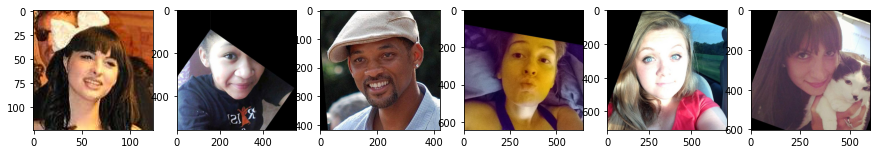

In [4]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [5]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age
    
    # Define parameter weights
    # calculate the closed form solution
    weights = np.linalg.inv(H.T @ H) @ H.T @ Y
    
    # separate the weights and bias
    bias    = weights[0]
    weights    = weights[1:]
    
    return weights, bias

# Validate

Your validate loss is: 67.84


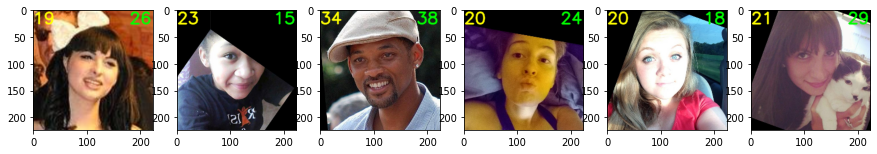

In [6]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [7]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])

Test results has saved to cfs.txt
[[28.04639963]
 [60.90374506]
 [55.19594925]
 [23.35683532]
 [35.20122169]
 [34.36335501]
 [36.63257245]
 [44.11504378]
 [18.49147786]
 [57.60077159]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [8]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # Init weights and bias
    weights = np.random.randn(2048, 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3
    
    for e in range(epoch):
        # forward pass
        prediction = np.dot(feature, weights) + bias

        # calculate loss
        y_true = age.reshape((-1, 1))
        loss = np.sum((y_true - prediction) ** 2) / feature.shape[0]
        
        # calculate gradient 
        dw = -(2 / feature.shape[0]) * np.dot(feature.T, y_true - prediction)
        db = -(2 / feature.shape[0]) * np.sum(y_true - prediction, axis = 0)

        # update weights
        weights = weights - lr * dw
        bias = bias - lr * db
        
        if momentum:
            pass # You  can also consider the gradient descent with momentum

    return weights, bias

# Train and validate

Your validate score is: 59.167


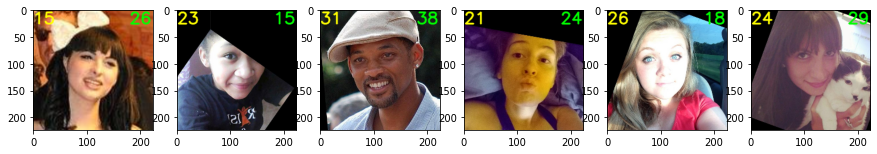

In [9]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [10]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[27.38911024]
 [73.99880653]
 [49.4684811 ]
 [22.07330512]
 [34.73385968]
 [31.6416988 ]
 [35.1922825 ]
 [42.34470721]
 [21.10637357]
 [54.73626193]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [11]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.rand(2048, 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
            
            # forward pass
            prediction = np.dot(batch_feature, weights) + bias

            # calculate loss
            y_true = batch_age.reshape((-1, 1))
            loss = np.sum((y_true - prediction) ** 2) / batch_feature.shape[0]

            # calculate gradient 
            dw = -(2 / batch_feature.shape[0]) * np.dot(batch_feature.T, y_true - prediction)
            db = -(2 / batch_feature.shape[0]) * np.sum(y_true - prediction, axis = 0)
            
            # update weights
            weights = weights - lr * dw
            bias = bias - lr * db 
                
            if momentum:
                pass # You can also consider the gradient descent with momentum
        
        print('=> epoch:', e + 1, '  Loss:', round(loss,4))
    return weights, bias

# Train and validate

=> epoch: 1   Loss: 251.6087
=> epoch: 2   Loss: 68.8319
=> epoch: 3   Loss: 36.0808
=> epoch: 4   Loss: 44.7398
=> epoch: 5   Loss: 19.3334
=> epoch: 6   Loss: 34.7265
=> epoch: 7   Loss: 17.6886
=> epoch: 8   Loss: 26.5641
=> epoch: 9   Loss: 50.0566
=> epoch: 10   Loss: 22.0215
=> epoch: 11   Loss: 28.7144
=> epoch: 12   Loss: 31.7285
=> epoch: 13   Loss: 24.113
=> epoch: 14   Loss: 18.82
=> epoch: 15   Loss: 15.6148
=> epoch: 16   Loss: 64.6447
=> epoch: 17   Loss: 40.3867
=> epoch: 18   Loss: 15.8084
=> epoch: 19   Loss: 29.8188
=> epoch: 20   Loss: 34.0746
=> epoch: 21   Loss: 26.8604
=> epoch: 22   Loss: 21.2895
=> epoch: 23   Loss: 74.2383
=> epoch: 24   Loss: 36.5042
=> epoch: 25   Loss: 20.3777
=> epoch: 26   Loss: 9.8109
=> epoch: 27   Loss: 40.9765
=> epoch: 28   Loss: 37.1168
=> epoch: 29   Loss: 32.2214
=> epoch: 30   Loss: 10.4832
=> epoch: 31   Loss: 63.5303
=> epoch: 32   Loss: 26.0742
=> epoch: 33   Loss: 11.5177
=> epoch: 34   Loss: 73.2768
=> epoch: 35   Loss: 36.12

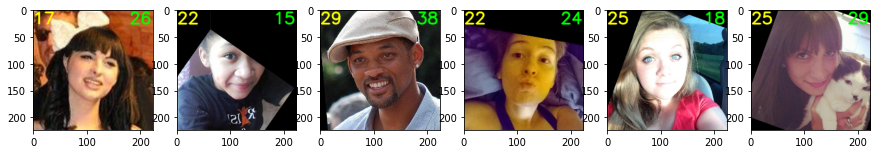

In [12]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [13]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[26.84573926]
 [73.15426367]
 [48.10536172]
 [22.59590837]
 [34.95371411]
 [32.06081474]
 [34.97822788]
 [41.61840043]
 [21.96218352]
 [54.9911178 ]]
